In [1]:
# https://youtu.be/tepxdcepTbY
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime


In [24]:
df = pd.read_csv('VLKAF_yeahoo.csv')
print(df.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2010-05-03  92.900002  92.900002  92.900002  92.900002  81.542542     100
1  2010-05-04  90.000000  91.250000  89.250000  91.250000  80.094269     200
2  2010-05-05  86.750000  87.199997  86.599998  86.599998  76.012749     100
3  2010-05-06  87.000000  87.000000  84.500000  84.500000  74.169487     200
4  2010-05-07  84.599998  84.599998  83.500000  83.750000  73.511169     200


In [78]:
df = pd.read_csv('VLKAF_final_data_with_sentiment.csv')
df = df.iloc[: , 1:]
print(df.head())

    timestamp   avg_price  dividend_yield  earnings_yield  enterprise_value  \
0  2015-03-02  250.675000          0.0219          0.1160      2.115300e+11   
1  2015-03-03  247.416667          0.0222          0.1176      2.098400e+11   
2  2015-03-04  244.275000          0.0223          0.1180      2.094400e+11   
3  2015-03-05  245.522100          0.0223          0.1180      2.094400e+11   
4  2015-03-06  247.700000          0.0221          0.1174      2.100800e+11   

   steel_price  sentiment  
0      939.740        1.0  
1      941.615        1.0  
2      919.085        1.0  
3      918.080        1.0  
4      901.390        1.0  


In [79]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df['timestamp'])
#print(train_dates.tail(15)) #Check last few dates. 

#Variables for training
cols = list(df)[1:]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']
print(train_dates[:2])
print(train_dates[-10:])

['avg_price', 'dividend_yield', 'earnings_yield', 'enterprise_value', 'steel_price', 'sentiment']
0   2015-03-02
1   2015-03-03
Name: timestamp, dtype: datetime64[ns]
2420   2021-10-16
2421   2021-10-17
2422   2021-10-18
2423   2021-10-19
2424   2021-10-20
2425   2021-10-21
2426   2021-10-22
2427   2021-10-23
2428   2021-10-24
2429   2021-10-25
Name: timestamp, dtype: datetime64[ns]


In [1]:
df[cols]

NameError: name 'df' is not defined

In [80]:
#New dataframe with only training data (without timestamp)
df_for_training = df[cols].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
print(df_for_training_scaled)

[[ 1.11299567  0.08832555  0.26691575  0.21171607 -0.42760114 -0.2119302 ]
 [ 1.05453271  0.11119716  0.29096065  0.16935568 -0.42147288 -0.2119302 ]
 [ 0.99816305  0.11882104  0.29697188  0.15932956 -0.49511003 -0.2119302 ]
 ...
 [ 2.44781449  1.05909867 -0.9558678   0.618192    1.65296703 -0.2119302 ]
 [ 2.49773072  1.03876835 -0.95987529  0.63590482  1.69307035  6.54441856]
 [ 2.54764695  1.01843802 -0.96388277  0.65361765  1.73317368  3.16624418]]


In [81]:
len(df_for_training_scaled)

2430

In [82]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i :i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (2416, 14, 6).
trainY shape == (2416, 1).


In [83]:
trainY

array([[1.29383256],
       [1.32516686],
       [1.21827385],
       ...,
       [2.44781449],
       [2.49773072],
       [2.54764695]])

Epoch 1/100
136/136 [==============================] - 2s 16ms/step - loss: 0.0644 - val_loss: 0.3600
Epoch 2/100
136/136 [==============================] - 2s 11ms/step - loss: 0.0219 - val_loss: 0.8721
Epoch 3/100
136/136 [==============================] - 1s 11ms/step - loss: 0.0198 - val_loss: 2.1900
Epoch 4/100
136/136 [==============================] - 1s 11ms/step - loss: 0.0167 - val_loss: 3.0290
Epoch 5/100
136/136 [==============================] - 1s 11ms/step - loss: 0.0150 - val_loss: 1.5026
Epoch 6/100
136/136 [==============================] - 1s 11ms/step - loss: 0.0144 - val_loss: 0.9967
Epoch 7/100
136/136 [==============================] - 1s 11ms/step - loss: 0.0132 - val_loss: 0.4833
Epoch 8/100
136/136 [==============================] - 2s 11ms/step - loss: 0.0123 - val_loss: 0.2211
Epoch 9/100
136/136 [==============================] - 2s 11ms/step - loss: 0.0113 - val_loss: 0.2875
Epoch 10/100
136/136 [==============================] - 2s 12ms/step - loss: 0.010

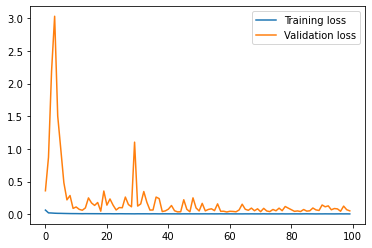

In [97]:
# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

# fit the model
history = model.fit(trainX, trainY, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [109]:
n_past = 16
n_days_for_prediction=16  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
print(predict_period_dates)

[Timestamp('2021-10-10 00:00:00', freq='D'), Timestamp('2021-10-11 00:00:00', freq='D'), Timestamp('2021-10-12 00:00:00', freq='D'), Timestamp('2021-10-13 00:00:00', freq='D'), Timestamp('2021-10-14 00:00:00', freq='D'), Timestamp('2021-10-15 00:00:00', freq='D'), Timestamp('2021-10-16 00:00:00', freq='D'), Timestamp('2021-10-17 00:00:00', freq='D'), Timestamp('2021-10-18 00:00:00', freq='D'), Timestamp('2021-10-19 00:00:00', freq='D'), Timestamp('2021-10-20 00:00:00', freq='D'), Timestamp('2021-10-21 00:00:00', freq='D'), Timestamp('2021-10-22 00:00:00', freq='D'), Timestamp('2021-10-23 00:00:00', freq='D'), Timestamp('2021-10-24 00:00:00', freq='D'), Timestamp('2021-10-25 00:00:00', freq='D')]


In [110]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

In [111]:
prediction

array([[2.1684175],
       [2.084731 ],
       [2.0973773],
       [2.0033748],
       [2.1864452],
       [2.2175677],
       [2.2286537],
       [2.2066689],
       [2.1716745],
       [2.134303 ],
       [2.1714778],
       [2.2709017],
       [2.4043918],
       [2.3294315],
       [2.4042134],
       [2.417225 ]], dtype=float32)

In [112]:
df_for_training.shape[1]

6

In [113]:
#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
prediction_copies

array([[2.1684175, 2.1684175, 2.1684175, 2.1684175, 2.1684175, 2.1684175],
       [2.084731 , 2.084731 , 2.084731 , 2.084731 , 2.084731 , 2.084731 ],
       [2.0973773, 2.0973773, 2.0973773, 2.0973773, 2.0973773, 2.0973773],
       [2.0033748, 2.0033748, 2.0033748, 2.0033748, 2.0033748, 2.0033748],
       [2.1864452, 2.1864452, 2.1864452, 2.1864452, 2.1864452, 2.1864452],
       [2.2175677, 2.2175677, 2.2175677, 2.2175677, 2.2175677, 2.2175677],
       [2.2286537, 2.2286537, 2.2286537, 2.2286537, 2.2286537, 2.2286537],
       [2.2066689, 2.2066689, 2.2066689, 2.2066689, 2.2066689, 2.2066689],
       [2.1716745, 2.1716745, 2.1716745, 2.1716745, 2.1716745, 2.1716745],
       [2.134303 , 2.134303 , 2.134303 , 2.134303 , 2.134303 , 2.134303 ],
       [2.1714778, 2.1714778, 2.1714778, 2.1714778, 2.1714778, 2.1714778],
       [2.2709017, 2.2709017, 2.2709017, 2.2709017, 2.2709017, 2.2709017],
       [2.4043918, 2.4043918, 2.4043918, 2.4043918, 2.4043918, 2.4043918],
       [2.3294315, 2.3294

In [114]:
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [115]:
y_pred_future

array([309.49713, 304.833  , 305.53784, 300.29877, 310.5019 , 312.23645,
       312.8543 , 311.62903, 309.67865, 307.59583, 309.6677 , 315.20892,
       322.64877, 318.47098, 322.63882, 323.36398], dtype=float32)

In [116]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
forecast_dates

[datetime.date(2021, 10, 10),
 datetime.date(2021, 10, 11),
 datetime.date(2021, 10, 12),
 datetime.date(2021, 10, 13),
 datetime.date(2021, 10, 14),
 datetime.date(2021, 10, 15),
 datetime.date(2021, 10, 16),
 datetime.date(2021, 10, 17),
 datetime.date(2021, 10, 18),
 datetime.date(2021, 10, 19),
 datetime.date(2021, 10, 20),
 datetime.date(2021, 10, 21),
 datetime.date(2021, 10, 22),
 datetime.date(2021, 10, 23),
 datetime.date(2021, 10, 24),
 datetime.date(2021, 10, 25)]

In [117]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'avg_price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
df_forecast

,Date,avg_price
0,2021-10-10,309.497131
1,2021-10-11,304.833008
2,2021-10-12,305.537842
3,2021-10-13,300.298767
4,2021-10-14,310.501892
5,2021-10-15,312.236450
6,2021-10-16,312.854309
7,2021-10-17,311.629028
8,2021-10-18,309.678650
9,2021-10-19,307.595825


In [118]:
original=[]
original = df[['timestamp', 'avg_price']]
original['Date']=pd.to_datetime(original['timestamp'])
original = original[original['Date'] >= '2021-7-15']
original.tail()

C:\Users\dawid\AppData\Local\Temp/ipykernel_2480/1084573752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['timestamp'])


,timestamp,avg_price,Date
2425,2021-10-21,320.135005,2021-10-21
2426,2021-10-22,322.286857,2021-10-22
2427,2021-10-23,325.068853,2021-10-23
2428,2021-10-24,327.850849,2021-10-24
2429,2021-10-25,330.632845,2021-10-25


c:\users\dawid\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\dawid\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


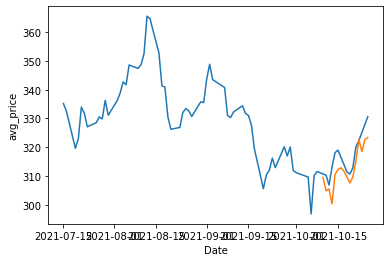

In [119]:
sns.lineplot(original['Date'], original['avg_price'])
sns.lineplot(df_forecast['Date'], df_forecast['avg_price'])